In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('Debernardi et al 2020 data.csv')
df.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                590 non-null    object 
 1   patient_cohort           590 non-null    object 
 2   sample_origin            590 non-null    object 
 3   age                      590 non-null    int64  
 4   sex                      590 non-null    object 
 5   diagnosis                590 non-null    int64  
 6   stage                    199 non-null    object 
 7   benign_sample_diagnosis  208 non-null    object 
 8   plasma_CA19_9            350 non-null    float64
 9   creatinine               590 non-null    float64
 10  LYVE1                    590 non-null    float64
 11  REG1B                    590 non-null    float64
 12  TFF1                     590 non-null    float64
 13  REG1A                    306 non-null    float64
dtypes: float64(6), int64(2), o

In [4]:
df.isnull().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

In [5]:
df.diagnosis.value_counts()

2    208
3    199
1    183
Name: diagnosis, dtype: int64

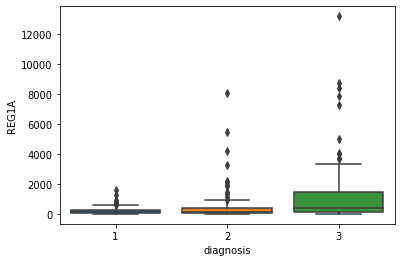

In [10]:
sns.boxplot(x='diagnosis', y='REG1A', data=df)
plt.show()

In [21]:
df.groupby('diagnosis').REG1A.count()

diagnosis
1     79
2     87
3    140
Name: REG1A, dtype: int64

In [28]:
df.REG1A.mode()

0    0.0
Name: REG1A, dtype: float64

In [26]:
df.groupby('diagnosis')['REG1A'].median()

diagnosis
1    113.000
2    127.174
3    411.006
Name: REG1A, dtype: float64

In [24]:
df.groupby('diagnosis').REG1A.describe()

,count,mean,std,min,25%,50%,75%,max
diagnosis,,,,,,,,
1,79.0,227.871886,288.272476,0.0,62.15350,113.000,285.60700,1617.142
2,87.0,547.458092,1210.159890,0.0,63.54550,127.174,405.43800,8083.492
3,140.0,1138.323721,1871.810807,0.0,152.33625,411.006,1435.60625,13200.000


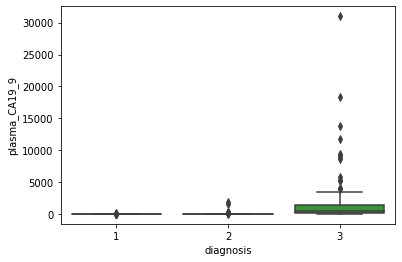

In [8]:
sns.boxplot(x='diagnosis', y='plasma_CA19_9', data=df)
plt.show()


In [9]:
df.groupby('diagnosis').plasma_CA19_9.describe()

,count,mean,std,min,25%,50%,75%,max
diagnosis,,,,,,,,
1,92.0,8.749569,12.189355,0.0,1.707332,5.334598,9.15,84.3
2,108.0,61.785741,235.816534,1.0,9.750000,17.000000,29.25,1913.0
3,150.0,1476.154733,3550.038158,0.6,99.700000,427.500000,1457.50,31000.0


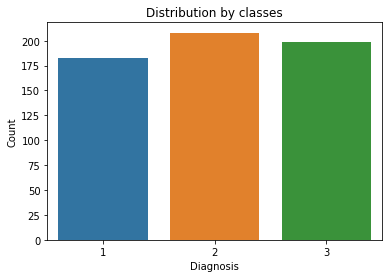

In [3]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='diagnosis')

# Add labels and title
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Distribution by classes')

# Show the plot
plt.show()

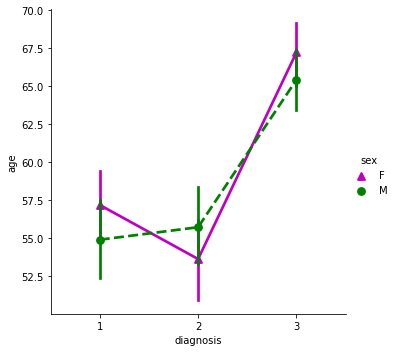

In [5]:
sns.catplot(
    data=df, x="diagnosis", y="age", hue="sex",
    palette={"M": "g", "F": "m"},
    markers=["^", "o"], linestyles=["-", "--"],
    kind="point"
)

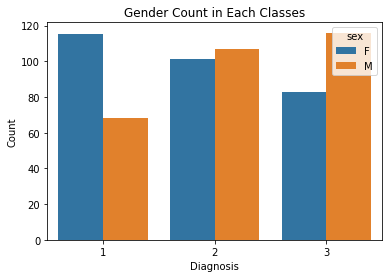

In [30]:
##### plt.figure(figsize=(6,4))
sns.countplot(data=df, x='diagnosis', hue='sex')

# Add labels and title
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Gender Count in Each Classes')

# Show the plot
plt.show()

In [7]:
gender = df.groupby(['sex'])['diagnosis'].value_counts()
print(gender)

sex  diagnosis
F    1            115
     2            101
     3             83
M    3            116
     2            107
     1             68
Name: diagnosis, dtype: int64


In [8]:
import plotly.express as px

In [11]:
df['sex'] = df['sex'].astype('category')
df['sex'] = df['sex'].cat.codes
df.head()

,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,33,0,1,11.700000,1.83222,0.893219,52.94884,654.282174,1262.000000
1,81,0,1,8.749569,0.97266,2.037585,94.46703,209.488250,228.407000
2,51,1,1,7.000000,0.78039,0.145589,102.36600,461.141000,227.871886
3,61,1,1,8.000000,0.70122,0.002805,60.57900,142.950000,227.871886
4,62,1,1,9.000000,0.21489,0.000860,65.54000,41.088000,227.871886


In [4]:
#drop multiple columns by name
df.drop(['patient_cohort', 
         'sample_origin',
         'stage', 
         'benign_sample_diagnosis',
         'sample_id'], axis=1, inplace=True)

In [5]:
df.groupby('diagnosis')['REG1A'].mean()

diagnosis
1     227.871886
2     547.458092
3    1138.323721
Name: REG1A, dtype: float64

In [6]:
df['REG1A'] = df['REG1A'].fillna(df.groupby('diagnosis')['REG1A'].transform('mean'))

In [7]:
df.groupby('diagnosis')['REG1A'].mean()

diagnosis
1     227.871886
2     547.458092
3    1138.323721
Name: REG1A, dtype: float64

In [8]:
df.groupby('diagnosis')['plasma_CA19_9'].mean()

diagnosis
1       8.749569
2      61.785741
3    1476.154733
Name: plasma_CA19_9, dtype: float64

In [9]:
df['plasma_CA19_9'] = df['plasma_CA19_9'].fillna(df.groupby('diagnosis')['plasma_CA19_9'].transform('mean'))

In [10]:
df.head()

,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,33,F,1,11.700000,1.83222,0.893219,52.94884,654.282174,1262.000000
1,81,F,1,8.749569,0.97266,2.037585,94.46703,209.488250,228.407000
2,51,M,1,7.000000,0.78039,0.145589,102.36600,461.141000,227.871886
3,61,M,1,8.000000,0.70122,0.002805,60.57900,142.950000,227.871886
4,62,M,1,9.000000,0.21489,0.000860,65.54000,41.088000,227.871886


In [ ]:
ax = sns.heatmap(df, annot=True)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

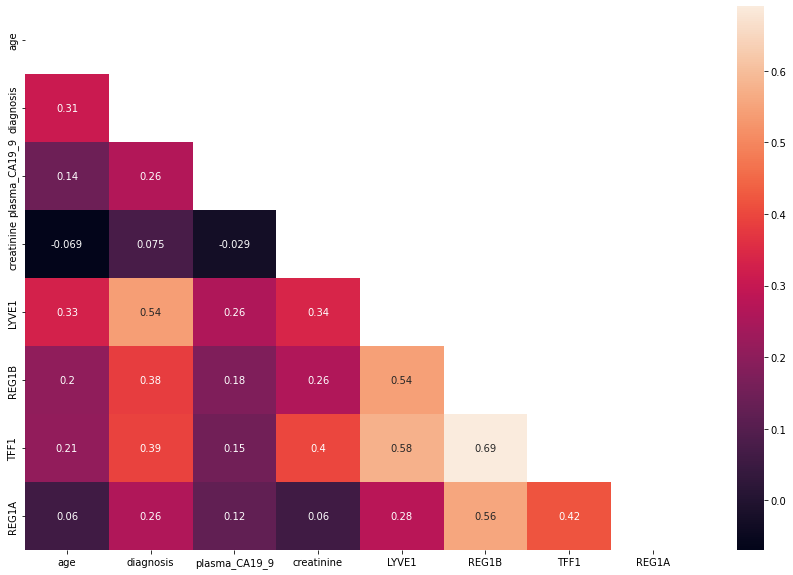

In [29]:
plt.figure(figsize=(15,10))
mask=np.triu(df.corr())
sns.heatmap(df.corr(),mask=mask,annot=True)
plt.show()

In [13]:
x = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
x.shape

(590, 8)

In [15]:
print(x_train.shape,x_test.shape)

(472, 8) (118, 8)


In [16]:
print(y_train.shape,y_test.shape)

(472,) (118,)


In [17]:
y_train = np.array(y_train) - 1
y_test = np.array(y_test) - 1

# Logistic regression

In [20]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
log_reg = LogisticRegression(multi_class='ovr', solver='liblinear')

# Perform cross-validation on the training set
cv_scores = cross_val_score(log_reg, x_train, y_train, cv=5)

print("Cross-validation scores: ", cv_scores)
print("Average cross-validation score: ", cv_scores.mean())

# Train and evaluate the model with the test set
log_reg.fit(x_train, y_train)
y_pred_log = log_reg.predict(x_test)

print(classification_report(y_test, y_pred_log))

Cross-validation scores:  [0.82105263 0.81052632 0.82978723 0.71276596 0.81914894]
Average cross-validation score:  0.7986562150055991
              precision    recall  f1-score   support

           0       0.82      0.98      0.89        41
           1       0.92      0.56      0.70        39
           2       0.80      0.95      0.87        38

    accuracy                           0.83       118
   macro avg       0.84      0.83      0.82       118
weighted avg       0.84      0.83      0.82       118



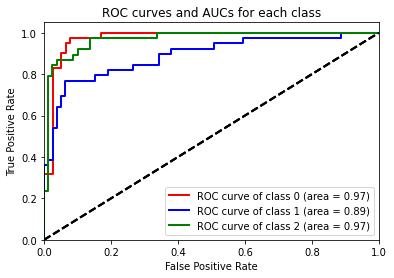

In [21]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict the class probabilities of the testing data
y_prob = log_reg.predict_proba(x_test)

# Compute the ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves and AUCs for each class
plt.figure()
lw = 2
colors = ['red', 'blue', 'green']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curves and AUCs for each class')
    plt.legend(loc="lower right")
plt.show()


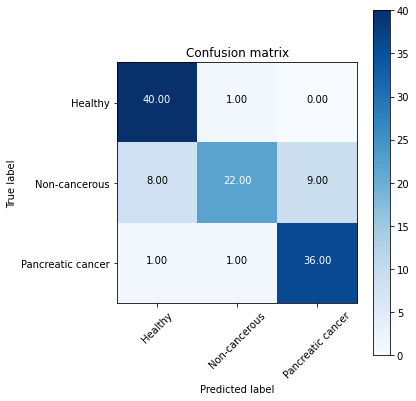

In [23]:
cm = confusion_matrix(y_test, y_pred_log)

# Define the labels for the confusion matrix
classes = ['Healthy', 'Non-cancerous', 'Pancreatic cancer']

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

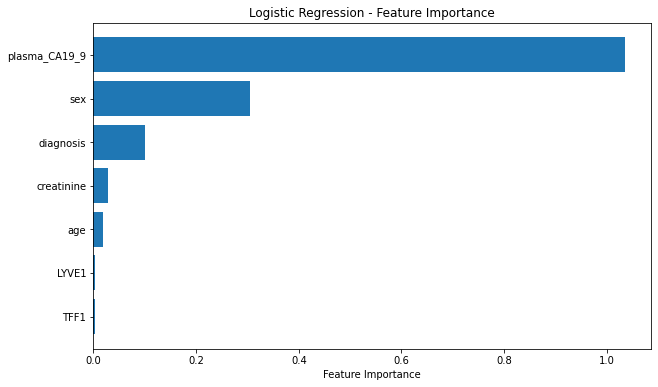

In [49]:
# Get the feature coefficients
feature_importance = np.abs(log_reg.coef_[0])

# Sort the feature importance in descending order
sorted_indices = np.argsort(feature_importance)[1::]
sorted_importance = feature_importance[sorted_indices]

# Get the feature names from your dataset (assuming they are stored in a list called 'feature_names')
sorted_feature_names = [df.columns[i] for i in sorted_indices]

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importance)), sorted_importance, align='center')
plt.yticks(range(len(sorted_importance)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.title('Logistic Regression - Feature Importance')
plt.show()

In [50]:
print(f"Feature '{sorted_feature_names}': Importance score {sorted_importance}")

Feature '['TFF1', 'LYVE1', 'age', 'creatinine', 'diagnosis', 'sex', 'plasma_CA19_9']': Importance score [0.00365786 0.00374688 0.01836726 0.02765692 0.10125162 0.30531965
 1.03473583]


# SVM

In [25]:
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report

# Initialize SVM model
svm_model = svm.SVC(kernel='rbf', C=100, gamma='scale', probability=True)

# Perform cross-validation (CV=5)
cv_scores = cross_val_score(svm_model, x, y, cv=5)

# Print cross-validation scores for each fold
print("Cross-validation scores:", cv_scores)

# Calculate and print average cross-validation score
avg_cv_score = cv_scores.mean()
print("Average cross-validation score:", avg_cv_score)

# Train and evaluate the model with the test set
svm_model.fit(x_train, y_train)
y_pred1 = svm_model.predict(x_test)
print(classification_report(y_test, y_pred1))

Cross-validation scores: [0.83050847 0.75423729 0.75423729 0.72033898 0.8559322 ]
Average cross-validation score: 0.7830508474576271
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        41
           1       0.71      0.77      0.74        39
           2       0.90      0.71      0.79        38

    accuracy                           0.81       118
   macro avg       0.82      0.81      0.81       118
weighted avg       0.82      0.81      0.81       118



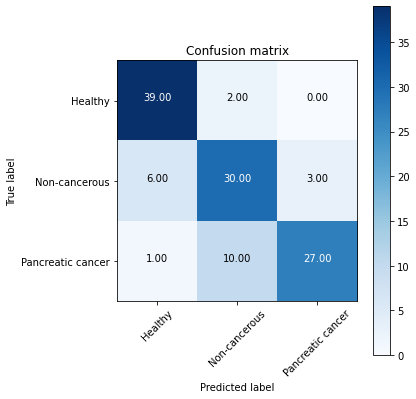

In [26]:
cm = confusion_matrix(y_test, y_pred1)

# Define the labels for the confusion matrix
classes = ['Healthy', 'Non-cancerous', 'Pancreatic cancer']

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

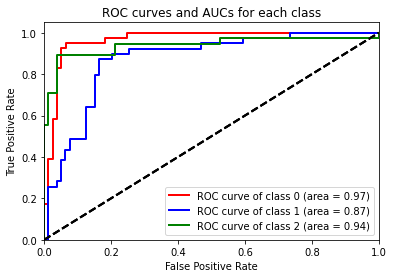

In [29]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Predict the class probabilities of the testing data
y_prob = svm_model.predict_proba(x_test)

# Compute the ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves and AUCs for each class
plt.figure()
lw = 2
colors = ['red', 'blue', 'green']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curves and AUCs for each class')
    plt.legend(loc="lower right")
plt.show()


Text(0, 0.5, 'Feautures')

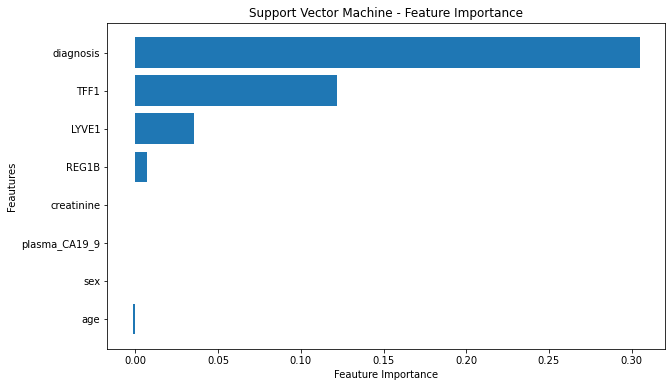

In [51]:
perm_importance = permutation_importance(svm_model, x_test, y_test)

feature_names = df.columns  # Replace with your feature names

features = np.array(feature_names)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.title('Support Vector Machine - Feature Importance')
plt.xlabel("Feauture Importance")
plt.ylabel("Feautures")

In [46]:
perm_importance.importances[sorted_idx]

array([[ 0.        , -0.00847458,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.00847458,  0.02542373, -0.00847458,  0.03389831,  0.00847458],
       [ 0.01694915,  0.00847458,  0.04237288,  0.04237288, -0.00847458],
       [ 0.13559322,  0.13559322,  0.18644068,  0.16101695,  0.1440678 ],
       [ 0.37288136,  0.3559322 ,  0.33050847,  0.28813559,  0.3220339 ]])

In [32]:
print('Training accuracy', np.mean(svm_model.predict(x_train) == y_train)*100)
print('Test accuracy', np.mean(svm_model.predict(x_test) == y_test)*100)

Training accuracy 84.53389830508475
Test accuracy 81.35593220338984


# XGBoost

In [56]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_sample_weight

In [52]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create an XGBoost classifier object with the desired hyperparameters
clf = xgb.XGBClassifier(objective='multi:softmax', num_class=3, missing=1)

# Define the hyperparameters to tune and their possible values
param_grid = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}

# Create a grid search object with the XGBoost classifier and the hyperparameters to tune
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, n_jobs = 2, verbose = 2, scoring='accuracy')

# Fit the grid search object on the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and their corresponding score
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Best hyperparameters: {'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 4, 'min_child_weight': 5, 'subsample': 0.8}
Best score: 0.8982530795072788


In [53]:
xgb = XGBClassifier(colsample_bytree = 0.6,
gamma = 1, 
max_depth = 4,
min_child_weight = 5,
subsample = 0.8)
xgb_tuned = xgb.fit(x_train,y_train)

In [54]:
y_pred = xgb_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

0.923728813559322

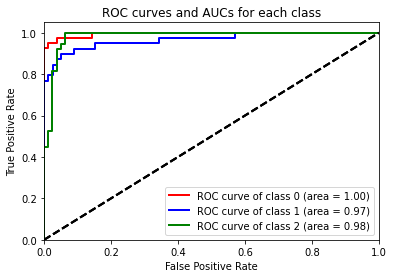

In [98]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict the class probabilities of the testing data
y_prob = xgb_tuned.predict_proba(x_test)

# Compute the ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves and AUCs for each class
plt.figure()
lw = 2
colors = ['red', 'blue', 'green']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curves and AUCs for each class')
    plt.legend(loc="lower right")
plt.show()


the results show that the classifier has high performance for all three classes, with AUC values of 1 for class 0, 0.97 for class 1, and 0.99 for class 2. This indicates that the classifier is doing an excellent job of distinguishing between the three classes. The ROC curves for each class are plotted in different colors, and the legend indicates the AUC value for each class. The black dashed line represents the ROC curve for a random classifier.

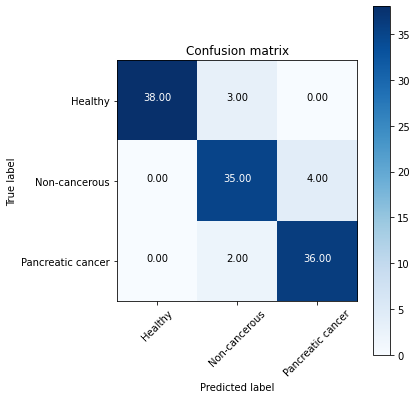

In [58]:
cm = confusion_matrix(y_test, y_pred)

# Define the labels for the confusion matrix
classes = ['Healthy', 'Non-cancerous', 'Pancreatic cancer']

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

Class 0 (healthy): There were 37 examples that were correctly classified as healthy (true negatives), 4 examples that were misclassified as non-cancerous pancreas condition (false positives), and 0 examples that were misclassified as pancreatic cancer (false positives).

Class 1 (non-cancerous pancreas condition): There were 36 examples that were correctly classified as non-cancerous pancreas condition (true negatives), 0 examples that were misclassified as healthy (false negatives), and 3 examples that were misclassified as pancreatic cancer (false positives).

Class 2 (pancreatic cancer): There were 36 examples that were correctly classified as pancreatic cancer (true negatives), 2 examples that were misclassified as healthy (false negatives), and 0 examples that were misclassified as non-cancerous pancreas condition (false positives).

In [59]:
print('\n-------------------- Key Metrics --------------------')
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

print('\n--------------- Classification Report ---------------\n')
print(classification_report(y_test, y_pred))
print('---------------------- XGBoost ----------------------') # unnecessary fancy styling


-------------------- Key Metrics --------------------

Accuracy: 0.92
Micro Precision: 0.92
Micro Recall: 0.92
Micro F1-score: 0.92

Macro Precision: 0.92
Macro Recall: 0.92
Macro F1-score: 0.92

Weighted Precision: 0.93
Weighted Recall: 0.92
Weighted F1-score: 0.92

--------------- Classification Report ---------------

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        41
           1       0.88      0.90      0.89        39
           2       0.90      0.95      0.92        38

    accuracy                           0.92       118
   macro avg       0.92      0.92      0.92       118
weighted avg       0.93      0.92      0.92       118

---------------------- XGBoost ----------------------


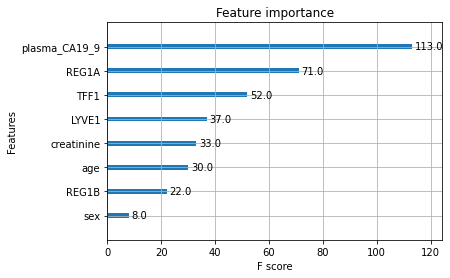

In [73]:
from xgboost import plot_importance
# plot feature importance
plot_importance(xgb)
plt.show()

# Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create a RandomForestClassifier object
clf = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [4,5,6,7,8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Train the GridSearchCV object on the training data
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]})

In [68]:
# Get the best hyperparameters and the corresponding classifier
best_params = grid_search.best_params_
best_clf = grid_search.best_estimator_

# Predict the class labels of the testing data using the best classifier
y_pred = best_clf.predict(x_test)

# Compute the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the best hyperparameters and the accuracy of the classifier
print("Best hyperparameters:", best_params)
print("Accuracy:", accuracy)

Best hyperparameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.8898305084745762


In [70]:
rfc = RandomForestClassifier (
    criterion = 'gini',
    max_depth = 4,
    bootstrap = False,
    min_samples_leaf = 1,
    min_samples_split = 10,
    n_estimators = 200
)

In [71]:
rfc_tuned = rfc.fit(x_train,y_train)

In [72]:
y_pred = rfc_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

0.8813559322033898

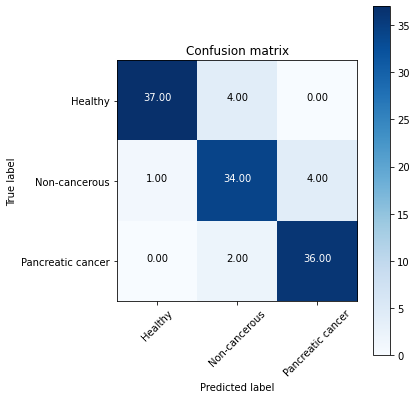

In [74]:
cm = confusion_matrix(y_test, y_pred)

# Define the labels for the confusion matrix
classes = ['Healthy', 'Non-cancerous', 'Pancreatic cancer']

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

In [75]:
print('\n-------------------- Key Metrics --------------------')
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

print('\n--------------- Classification Report ---------------\n')
print(classification_report(y_test, y_pred))
print('---------------------- Random Forest ----------------------') # unnecessary fancy styling


-------------------- Key Metrics --------------------

Accuracy: 0.91
Micro Precision: 0.91
Micro Recall: 0.91
Micro F1-score: 0.91

Macro Precision: 0.91
Macro Recall: 0.91
Macro F1-score: 0.91

Weighted Precision: 0.91
Weighted Recall: 0.91
Weighted F1-score: 0.91

--------------- Classification Report ---------------

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        41
           1       0.85      0.87      0.86        39
           2       0.90      0.95      0.92        38

    accuracy                           0.91       118
   macro avg       0.91      0.91      0.91       118
weighted avg       0.91      0.91      0.91       118

---------------------- Random Forest ----------------------


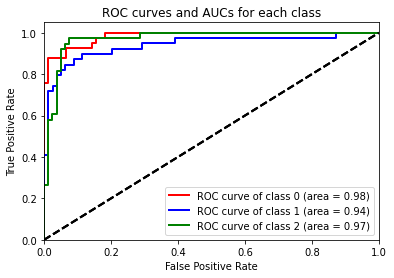

In [99]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict the class probabilities of the testing data
y_prob = rfc_tuned.predict_proba(x_test)

# Compute the ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves and AUCs for each class
plt.figure()
lw = 2
colors = ['red', 'blue', 'green']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curves and AUCs for each class')
    plt.legend(loc="lower right")
plt.show()


Feature 'plasma_CA19_9': Importance score 0.023456563152226412
Feature 'age': Importance score 0.056031320629402935
Feature 'LYVE1': Importance score 0.06168900062137468
Feature 'REG1B': Importance score 0.07328207477185975
Feature 'creatinine': Importance score 0.10190630653592864
Feature 'TFF1': Importance score 0.24920307196419297
Feature 'diagnosis': Importance score 0.42972559808785915


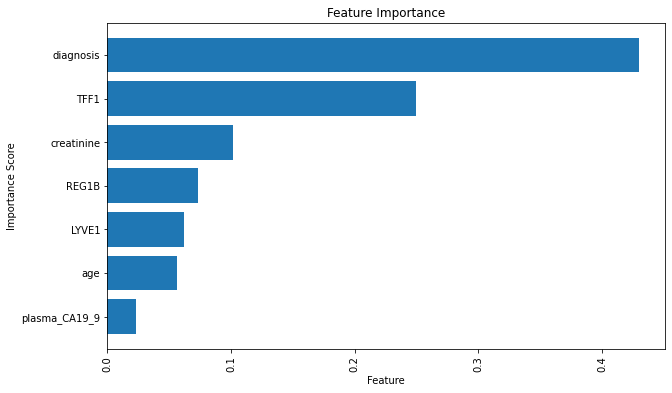

In [96]:
# Get feature importance scores
feature_importance = rfc_tuned.feature_importances_

# Sort feature importance scores in descending order
sorted_indices = np.argsort(feature_importance)[1::]
sorted_feature_importance = feature_importance[sorted_indices]

# Print feature importance scores
for feature_idx, importance_score in zip(sorted_indices, sorted_feature_importance):
    feature_name = df.columns[feature_idx]
    print(f"Feature '{feature_name}': Importance score {importance_score}")

# Optionally, visualize feature importance scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importance)), sorted_feature_importance)
plt.yticks(range(len(sorted_feature_importance)), [df.columns[idx] for idx in sorted_indices])
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()